In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
df_train = pd.read_csv('train.csv')

In [9]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
for col in df_train.columns:
    msg = 'column: {:10}\t Percent of Nan value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column: Survived  	 Percent of Nan value: 0.00%
column: Pclass    	 Percent of Nan value: 0.00%
column: Name      	 Percent of Nan value: 0.00%
column: Sex       	 Percent of Nan value: 0.00%
column: Age       	 Percent of Nan value: 19.87%
column: SibSp     	 Percent of Nan value: 0.00%
column: Parch     	 Percent of Nan value: 0.00%
column: Ticket    	 Percent of Nan value: 0.00%
column: Fare      	 Percent of Nan value: 0.00%
column: Cabin     	 Percent of Nan value: 77.10%
column: Embarked  	 Percent of Nan value: 0.22%


In [12]:
df_train[col].shape

(891,)

In [14]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

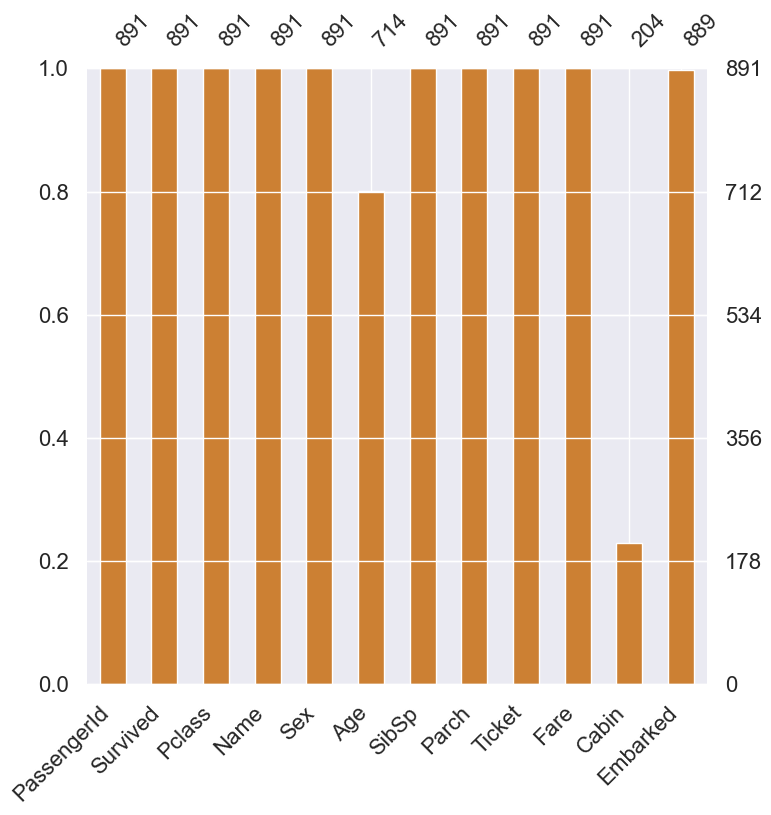

In [15]:
msno.bar(df = df_train.iloc[:,:], figsize = (8,8), color=(0.8, 0.5, 0.2))

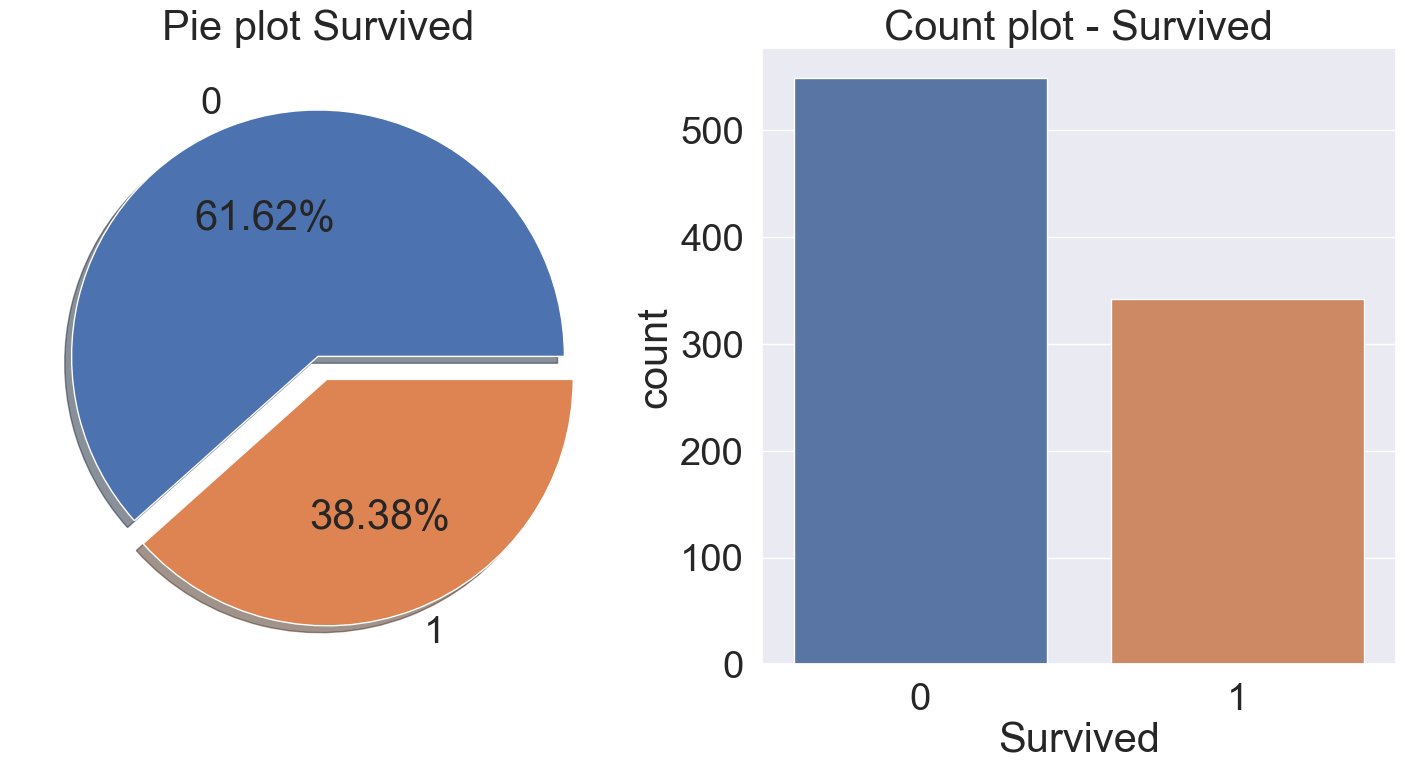

In [18]:
f,ax=plt.subplots(1,2,figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.2f%%', ax= ax[0],shadow =True)
ax[0].set_title('Pie plot Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [20]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count().rename(columns = {'Survived':'Total'})

,Total
Pclass,
1,216
2,184
3,491


In [21]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

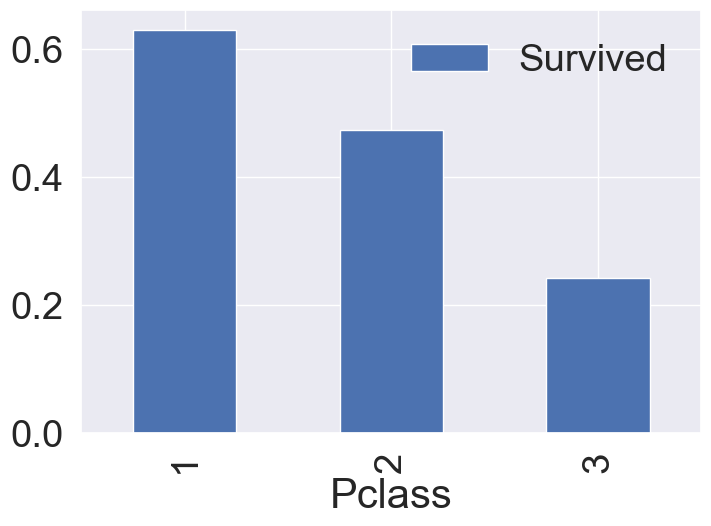

In [23]:
df_train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by = 'Survived',ascending = False).plot.bar()

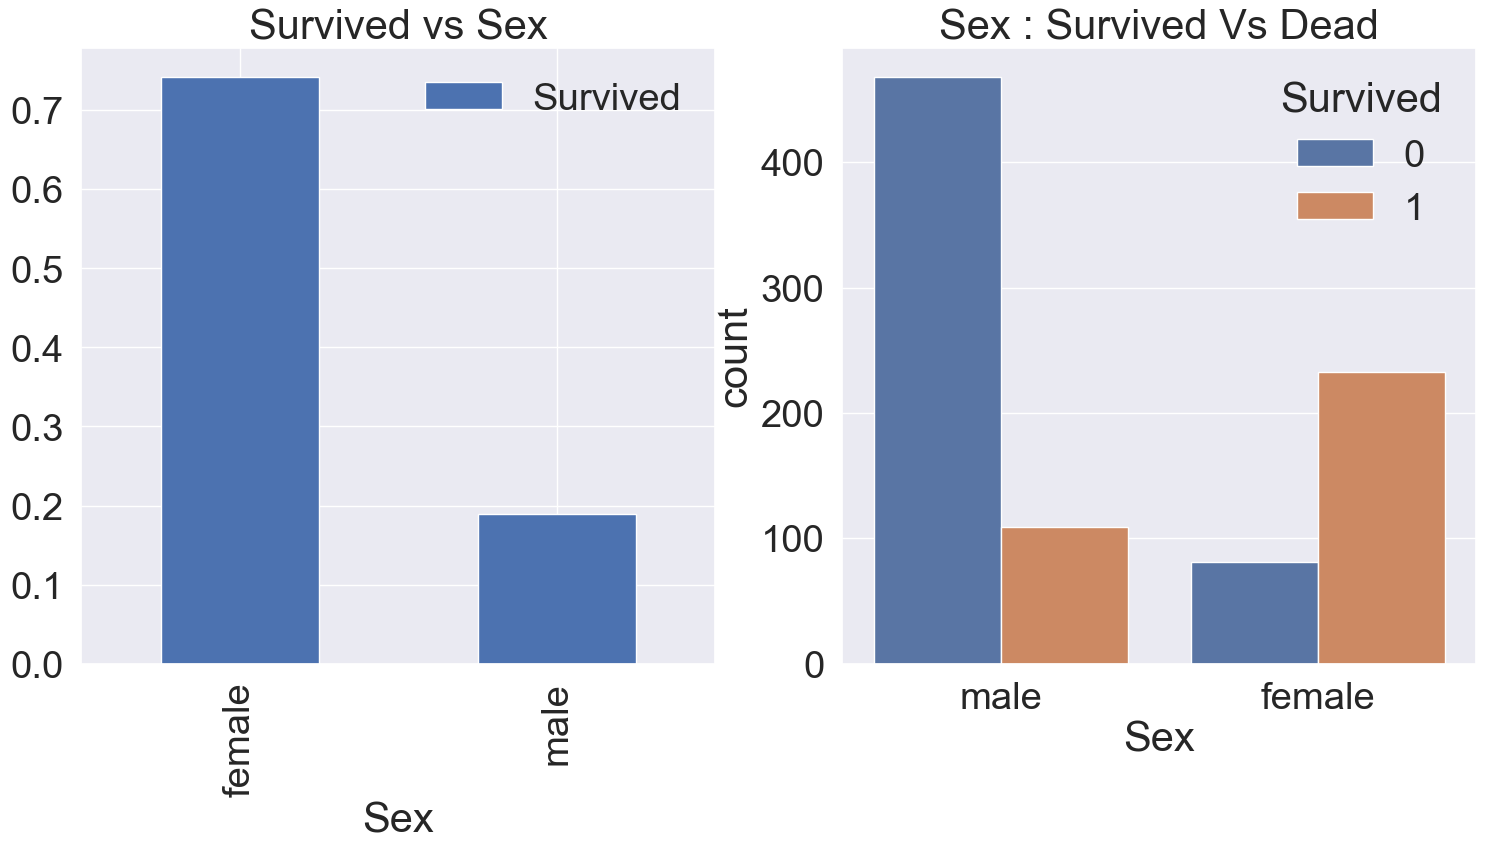

In [25]:
f,ax=plt.subplots(1,2,figsize = (18,8))

df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue = 'Survived' ,data=df_train,ax=ax[1])
ax[1].set_title('Sex : Survived Vs Dead')

plt.show()

In [27]:
df_train[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by = 'Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Pclass', ylabel='Survived'>

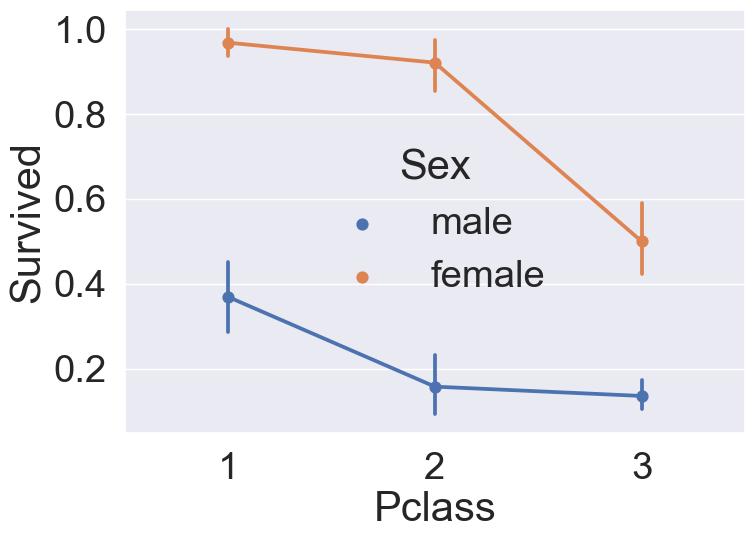

In [33]:
sns.pointplot(x='Pclass',y='Survived',hue ='Sex',data=df_train)

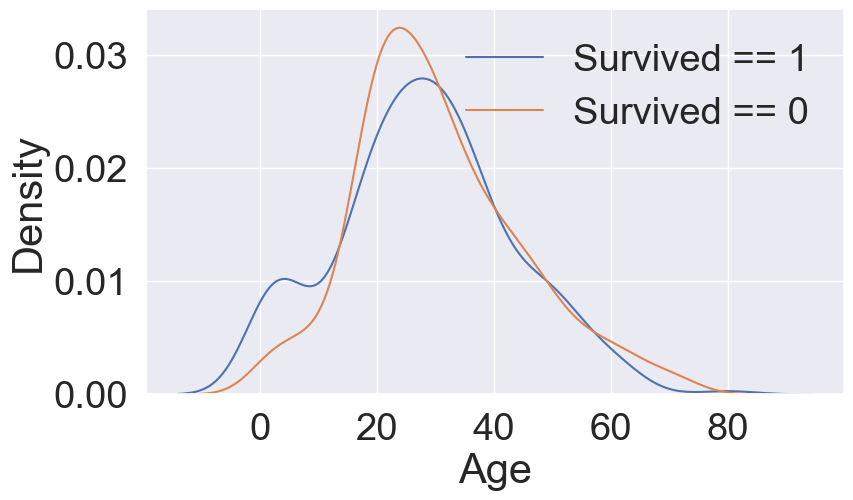

In [34]:
fig , ax = plt.subplots(1,1,figsize =(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived == 1','Survived == 0'])

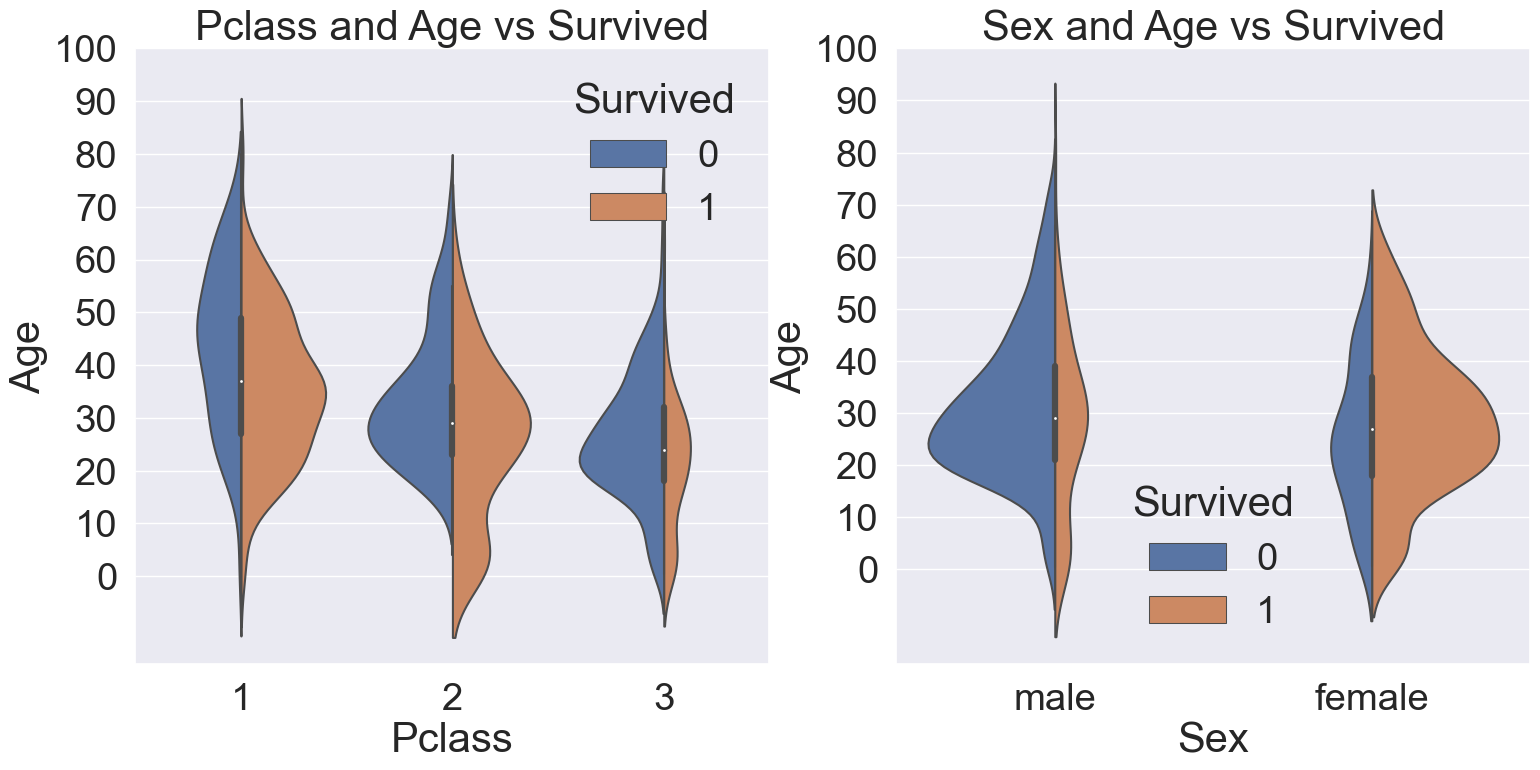

In [42]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age",hue = "Survived",data=df_train, scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age",hue = "Survived",data=df_train, scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

In [43]:
import re

In [44]:
df_train['Ticket'] = df_train.apply(lambda x: re.sub(r'[^0-9]', '', x.Ticket), axis=1)

In [45]:
df_train[df_train['Ticket'] != '']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
df_train =df_train[df_train.Ticket != '']

In [47]:
for i in range(1, 10):
    df_train['Ticket'] = df_train.apply(lambda x: i if str(x['Ticket'])[0] == str(i) else x['Ticket'], axis=1)

In [48]:
df_train[['Ticket', 'Survived']].groupby('Ticket').mean().sort_values(by='Survived', ascending=False)

,Survived
Ticket,
9,1.000000
1,0.612335
2,0.425000
7,0.266667
3,0.255193
5,0.137931
4,0.100000
6,0.071429
8,0.000000


In [49]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          683
Embarked         2
dtype: int64

In [50]:
#정규표현식을 사용 # ex ) .있는 경우에가져옴
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

In [51]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,513,0,0,6,1


In [54]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [55]:
df_train[['Initial','Age']].groupby('Initial').mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.744444
Mrs,35.981818
Other,45.888889


In [57]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mr'),'Age'] == 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mrs'),'Age'] == 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Master'),'Age'] == 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'),'Age'] == 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Other'),'Age'] == 46

Series([], Name: Age, dtype: bool)

In [61]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,5,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,3,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,2,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,1,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,1,30.0000,C148,C,Mr


In [60]:
df_train['Embarked'].fillna('S', inplace=True)